@davisilvaporto 20/04/2021 

Busquei através de pesquisa na internet dois modelos de dados em formato json para importar no MongoDB,
são os datasets "students" e "products", retirados de um repositório do github:
https://github.com/ozlerhakan/mongodb-json-files/blob/master/datasets

Na sequência importamos os dois datasets no mongodB:


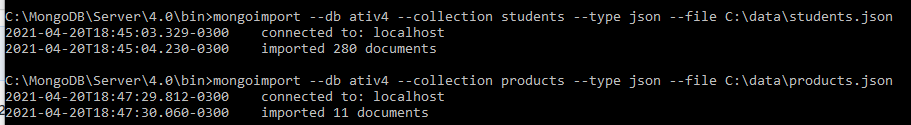

In [7]:
from IPython.display import Image
Image("import.png")

Apresentando o modelo de dados da coleção students:

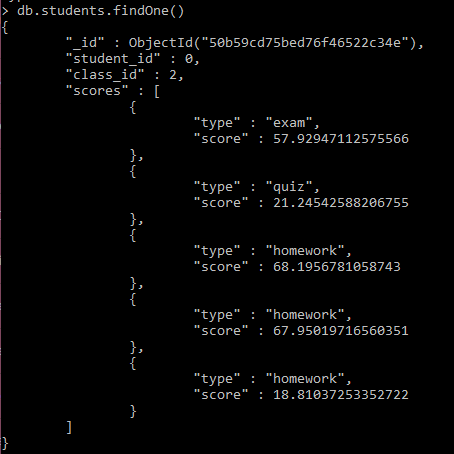

In [9]:
Image("students.png")

Apresentando o modelo de dados da coleção students:

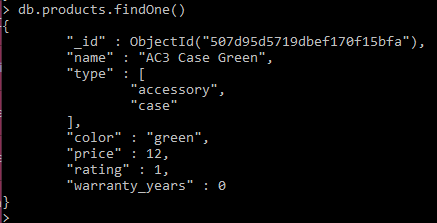

In [10]:
Image("products.png")

In [3]:
#importando mongoclient
from pymongo import MongoClient

In [4]:
#estabelecendo uma conexão
conn = MongoClient()

In [5]:
#verificando a conexão
try:
    conn = MongoClient()
    print(f"MongoDB Conectado")
except:
    print(f"Não conectado")

MongoDB Conectado


In [6]:
#conectando a base de coleções
db = conn.ativ4

In [7]:
colecao_1 = db.students
colecao_2 = db.products

In [18]:
#dados a inserir na colecao students
create_1 = {"student_id" : 2,
        "class_id" : 25,
        "scores" : [
                {
                        "type" : "exam",
                        "score" : 60.27
                },
                {
                        "type" : "quiz",
                        "score" : 64.27
                },
                {
                        "type" : "homework",
                        "score" : 82.27
                }
        ]}
create_2 = {"student_id" : 3,
        "class_id" : 10,
        "scores" : [
                {
                        "type" : "exam",
                        "score" : 60.25
                },
                {
                        "type" : "quiz",
                        "score" : 64.25
                },
                {
                        "type" : "homework",
                        "score" : 82.25
                }
        ]}
#inserindo os dados:
record_1 = colecao_1.insert_one(create_1)
record_2 = colecao_1.insert_one(create_2)
print(f"Registros Inseridos",record_1, " ", record_2)

Registros Inseridos <pymongo.results.InsertOneResult object at 0x0000029B9F9584C0>   <pymongo.results.InsertOneResult object at 0x0000029B9F911C00>


In [22]:
#lendo os dados do mongo, os inseridos são os dois últimos dados 
cursor = colecao_1.find()
for record in cursor:
    print(record)

{'_id': ObjectId('50b59cd75bed76f46522c34e'), 'student_id': 0, 'class_id': 2, 'scores': [{'type': 'exam', 'score': 57.92947112575566}, {'type': 'quiz', 'score': 21.24542588206755}, {'type': 'homework', 'score': 68.1956781058743}, {'type': 'homework', 'score': 67.95019716560351}, {'type': 'homework', 'score': 18.81037253352722}]}
{'_id': ObjectId('50b59cd75bed76f46522c34f'), 'student_id': 0, 'class_id': 28, 'scores': [{'type': 'exam', 'score': 39.17749400402234}, {'type': 'quiz', 'score': 78.44172815491468}, {'type': 'homework', 'score': 20.81782269075502}, {'type': 'homework', 'score': 70.44520452408949}, {'type': 'homework', 'score': 50.66616327819226}, {'type': 'homework', 'score': 53.84983118363991}]}
{'_id': ObjectId('50b59cd75bed76f46522c352'), 'student_id': 0, 'class_id': 24, 'scores': [{'type': 'exam', 'score': 4.444435759027499}, {'type': 'quiz', 'score': 28.63057857803885}, {'type': 'homework', 'score': 86.79352850434199}, {'type': 'homework', 'score': 83.9164548767836}]}
{'_i

In [8]:
#dados a inserir na colecao products
create_3 = {
        "name" : "AC2 Case White",
        "type" : [
                "accessory",
                "case"
        ],
        "color" : "White",
        "price" : 13,
        "rating" : 2,
        "warranty_years" : 0
}
create_4 = {
        "name" : "AC1 Case Brown",
        "type" : [
                "accessory",
                "case"
        ],
        "color" : "Brown",
        "price" : 15,
        "rating" : 3,
        "warranty_years" : 0
}
#inserindo os dados

record_3 = colecao_2.insert_one(create_3)
record_4 = colecao_2.insert_one(create_4)
print(f"Registros Inseridos",record_3, " ", record_4)


Registros Inseridos <pymongo.results.InsertOneResult object at 0x0000026CD4607980>   <pymongo.results.InsertOneResult object at 0x0000026CD45BD900>


In [9]:
#lendo os dados do mongo,coleção products, os inseridos são os dois últimos dados 
cursor = colecao_2.find()
for record in cursor:
    print(record)

{'_id': ObjectId('507d95d5719dbef170f15bfa'), 'name': 'AC3 Case Green', 'type': ['accessory', 'case'], 'color': 'green', 'price': 12, 'rating': 1, 'warranty_years': 0}
{'_id': ObjectId('507d95d5719dbef170f15bfb'), 'name': 'Phone Extended Warranty', 'type': 'warranty', 'price': 38, 'rating': 5, 'warranty_years': 2, 'for': ['ac3', 'ac7', 'ac9', 'qp7', 'qp8', 'qp9']}
{'_id': ObjectId('507d95d5719dbef170f15bfc'), 'name': 'AC3 Case Black', 'type': ['accessory', 'case'], 'color': 'black', 'price': 12.5, 'rating': 2, 'warranty_years': 0.25, 'available': False, 'for': 'ac3'}
{'_id': ObjectId('507d95d5719dbef170f15bfd'), 'name': 'AC3 Case Red', 'type': ['accessory', 'case'], 'color': 'red', 'price': 12, 'rating': 4, 'warranty_years': 0.25, 'available': True, 'for': 'ac3'}
{'_id': ObjectId('507d95d5719dbef170f15bfe'), 'name': 'Phone Service Basic Plan', 'type': 'service', 'monthly_price': 40, 'rating': 3, 'limits': {'voice': {'units': 'minutes', 'n': 400, 'over_rate': 0.05}, 'data': {'units': 'g

In [10]:
#atualizando dados nas coleções 1-students 2-products
update_1 = colecao_1.update_one({"student_id" : 2,},{
                 "$set":{
                     "name": "Rogerio",
                     "email":"rogeriocv@gmail.com"
                     }
})
update_2 = colecao_2.update_one({"name" : "AC1 Case Brown"},{
                 "$set":{
                    "price" : 10,
                     "color" : "Red"
                     }
})
print(f"Campos atualizados:",update_1," ",update_2)

Campos atualizados: <pymongo.results.UpdateResult object at 0x0000026CD45FA180>   <pymongo.results.UpdateResult object at 0x0000026CD4C1B780>


In [11]:
#exibindo novamente os dados da coleção 1
cursor = colecao_1.find()
for record in cursor:
    print(record)

{'_id': ObjectId('50b59cd75bed76f46522c34e'), 'student_id': 0, 'class_id': 2, 'scores': [{'type': 'exam', 'score': 57.92947112575566}, {'type': 'quiz', 'score': 21.24542588206755}, {'type': 'homework', 'score': 68.1956781058743}, {'type': 'homework', 'score': 67.95019716560351}, {'type': 'homework', 'score': 18.81037253352722}]}
{'_id': ObjectId('50b59cd75bed76f46522c34f'), 'student_id': 0, 'class_id': 28, 'scores': [{'type': 'exam', 'score': 39.17749400402234}, {'type': 'quiz', 'score': 78.44172815491468}, {'type': 'homework', 'score': 20.81782269075502}, {'type': 'homework', 'score': 70.44520452408949}, {'type': 'homework', 'score': 50.66616327819226}, {'type': 'homework', 'score': 53.84983118363991}]}
{'_id': ObjectId('50b59cd75bed76f46522c352'), 'student_id': 0, 'class_id': 24, 'scores': [{'type': 'exam', 'score': 4.444435759027499}, {'type': 'quiz', 'score': 28.63057857803885}, {'type': 'homework', 'score': 86.79352850434199}, {'type': 'homework', 'score': 83.9164548767836}]}
{'_i

In [12]:
#exibindo novamente os dados da coleção 2
cursor = colecao_2.find()
for record in cursor:
    print(record)

{'_id': ObjectId('507d95d5719dbef170f15bfa'), 'name': 'AC3 Case Green', 'type': ['accessory', 'case'], 'color': 'green', 'price': 12, 'rating': 1, 'warranty_years': 0}
{'_id': ObjectId('507d95d5719dbef170f15bfb'), 'name': 'Phone Extended Warranty', 'type': 'warranty', 'price': 38, 'rating': 5, 'warranty_years': 2, 'for': ['ac3', 'ac7', 'ac9', 'qp7', 'qp8', 'qp9']}
{'_id': ObjectId('507d95d5719dbef170f15bfc'), 'name': 'AC3 Case Black', 'type': ['accessory', 'case'], 'color': 'black', 'price': 12.5, 'rating': 2, 'warranty_years': 0.25, 'available': False, 'for': 'ac3'}
{'_id': ObjectId('507d95d5719dbef170f15bfd'), 'name': 'AC3 Case Red', 'type': ['accessory', 'case'], 'color': 'red', 'price': 12, 'rating': 4, 'warranty_years': 0.25, 'available': True, 'for': 'ac3'}
{'_id': ObjectId('507d95d5719dbef170f15bfe'), 'name': 'Phone Service Basic Plan', 'type': 'service', 'monthly_price': 40, 'rating': 3, 'limits': {'voice': {'units': 'minutes', 'n': 400, 'over_rate': 0.05}, 'data': {'units': 'g

In [13]:
#deletando, excluindo um registro da coleção 1
delete_1 = colecao_1.delete_one({'student_id': 2, 'class_id': 25,'email': 'rogeriocv@gmail.com', 'name': 'Rogerio'})
print("Dado excluido", delete_1)

Dado excluido <pymongo.results.DeleteResult object at 0x0000026CD4B03EC0>


In [14]:
#deletando, excluindo um registro da coleção 2
delete_2 = colecao_2.delete_one({'name': 'AC3 Case Green','color': 'green' })
print("Dado excluido", delete_2)

Dado excluido <pymongo.results.DeleteResult object at 0x0000026CD4C73B80>


In [15]:
#exibindo novamente os dados da coleção 1
cursor = colecao_1.find()
for record in cursor:
    print(record)

{'_id': ObjectId('50b59cd75bed76f46522c34e'), 'student_id': 0, 'class_id': 2, 'scores': [{'type': 'exam', 'score': 57.92947112575566}, {'type': 'quiz', 'score': 21.24542588206755}, {'type': 'homework', 'score': 68.1956781058743}, {'type': 'homework', 'score': 67.95019716560351}, {'type': 'homework', 'score': 18.81037253352722}]}
{'_id': ObjectId('50b59cd75bed76f46522c34f'), 'student_id': 0, 'class_id': 28, 'scores': [{'type': 'exam', 'score': 39.17749400402234}, {'type': 'quiz', 'score': 78.44172815491468}, {'type': 'homework', 'score': 20.81782269075502}, {'type': 'homework', 'score': 70.44520452408949}, {'type': 'homework', 'score': 50.66616327819226}, {'type': 'homework', 'score': 53.84983118363991}]}
{'_id': ObjectId('50b59cd75bed76f46522c352'), 'student_id': 0, 'class_id': 24, 'scores': [{'type': 'exam', 'score': 4.444435759027499}, {'type': 'quiz', 'score': 28.63057857803885}, {'type': 'homework', 'score': 86.79352850434199}, {'type': 'homework', 'score': 83.9164548767836}]}
{'_i

In [16]:
#exibindo novamente os dados da coleção 2
cursor = colecao_2.find()
for record in cursor:
    print(record)

{'_id': ObjectId('507d95d5719dbef170f15bfb'), 'name': 'Phone Extended Warranty', 'type': 'warranty', 'price': 38, 'rating': 5, 'warranty_years': 2, 'for': ['ac3', 'ac7', 'ac9', 'qp7', 'qp8', 'qp9']}
{'_id': ObjectId('507d95d5719dbef170f15bfc'), 'name': 'AC3 Case Black', 'type': ['accessory', 'case'], 'color': 'black', 'price': 12.5, 'rating': 2, 'warranty_years': 0.25, 'available': False, 'for': 'ac3'}
{'_id': ObjectId('507d95d5719dbef170f15bfd'), 'name': 'AC3 Case Red', 'type': ['accessory', 'case'], 'color': 'red', 'price': 12, 'rating': 4, 'warranty_years': 0.25, 'available': True, 'for': 'ac3'}
{'_id': ObjectId('507d95d5719dbef170f15bfe'), 'name': 'Phone Service Basic Plan', 'type': 'service', 'monthly_price': 40, 'rating': 3, 'limits': {'voice': {'units': 'minutes', 'n': 400, 'over_rate': 0.05}, 'data': {'units': 'gigabytes', 'n': 20, 'over_rate': 1}, 'sms': {'units': 'texts sent', 'n': 100, 'over_rate': 0.001}}, 'term_years': 2}
{'_id': ObjectId('507d95d5719dbef170f15bff'), 'name

Fim deste projeto!

Referências:
MongoDB: The Definitive Guide
by Kristina Chodorow and Michael Dirolf

Python for Data Analysis
by Wes McKinney

https://www.datascienceacademy.com.br/ .Acessado em 20/04/2021
